# Plotting canon fic

In [1]:
import sys; sys.path.append('../..')
from abslithist.words import *
from abslithist.realism import *

import plotnine as p9
JITTER=0
VERSION='v3'
p9.options.dpi=600
p9.options.figure_size=(11.7,8.3)
factor=2.5
cutoff=1600
spcr=40
prebreak_cuts=[1500,1000,0,-1000]
prebreaks=[cutoff - (spcr*(i+1)) for i in range(len(prebreak_cuts))]
breaks=[1600,1700,1800,1900,2000]


colors = {'Allegory': '#33a02c',
 'Dialogue': '#1f78b4',
 'Epic': '#b2df8a',
 'Novel': '#a6cee3',
 'Novella': '#fb9a99',
 'Other': '#e31a1c',
 'Pastoral': '#fdbf6f',
 'Picaresque': '#ff7f00',
 'Romance': '#cab2d6',
 'Satire': '#6a3d9a',
 'Tale': '#94945a',
 'Unknown': 'gray',
 'Verse':'#b15928'}

shapes =  {'Allegory': 'd',
 'Dialogue': '8',
 'Epic': '<',
 'Novel': 'o',
 'Novella': 'v',
 'Other': 'h',
 'Pastoral': 'D',
 'Picaresque': '>',
 'Romance': 's',
 'Satire': 'x',
 'Tale': '+',
 'Unknown': '.',
 'Verse':'*'}


# function to compact years
def edityear(y,spcr=spcr,cutoff=cutoff,breaks=prebreak_cuts):
    if y>=cutoff: return y
    for i,brk in enumerate(breaks):
        if y>brk:
            brk0=breaks[i-1] if i-1>=0 else cutoff
            return int((cutoff-(spcr*(i+1))) + ((y-brk)/(brk0-brk))*spcr)

In [2]:
import lltk,pandas as pd
df=pd.read_feather('../../data/scores/data.canon_fic_scores.v2.ft')
C=lltk.load('CanonFiction')

In [3]:
from scipy.stats import zscore

# df['median_z']=zscore(df['median'])
df

,id,contrast,source,period,mean,median,sum,std,size
0,chadwyck.Haywood.The_Fatal_Secret_a_machin.1041,Abs-Conc,LSN-Hapt,C16,-0.341868,-0.505875,-1469.007567,0.816953,4297
1,chadwyck.Haywood.The_Fatal_Secret_a_machin.1041,Abs-Conc,LSN-Imag,C16,-0.504876,-0.683759,-2169.451530,0.860748,4297
2,chadwyck.Haywood.The_Fatal_Secret_a_machin.1041,Abs-Conc,MRC-Conc,C16,-0.531029,-0.736874,-2281.832301,0.883268,4297
3,chadwyck.Haywood.The_Fatal_Secret_a_machin.1041,Abs-Conc,MRC-Imag,C16,-0.314584,-0.478982,-1351.766714,0.902743,4297
4,chadwyck.Haywood.The_Fatal_Secret_a_machin.1041,Abs-Conc,MT-Conc,C16,-0.647206,-0.813839,-2781.046087,0.828056,4297
...,...,...,...,...,...,...,...,...,...
110259,chadwyck.Ingraham.The_Spanish_Galleon_or_Th.0449,Abs-Conc,MRC-Imag,orig,0.440203,0.583889,2227.867830,0.851227,5061
110260,chadwyck.Ingraham.The_Spanish_Galleon_or_Th.0449,Abs-Conc,MT-Conc,orig,0.501107,0.576020,4734.454378,1.002769,9448
110261,chadwyck.Ingraham.The_Spanish_Galleon_or_Th.0449,Abs-Conc,PAV-Conc,orig,0.318329,0.893047,392.499528,1.006203,1233
110262,chadwyck.Ingraham.The_Spanish_Galleon_or_Th.0449,Abs-Conc,PAV-Imag,orig,0.461812,0.841898,577.265569,0.916141,1250


In [4]:
# filter
meta=C.meta
#meta.query('corpus_source=="Chadwyck"').nation.value_counts()
# meta=meta[(meta.canon_genre!='') | (meta.corpus_source!='Chadwyck') | (meta.nation!='American')]
meta=meta[(meta.corpus_source!='Chadwyck') | (meta.nation!='American')]
meta

,author,title,year,canon_genre,canon_name,major_genre,setting_elson,year_trans,author_id,corpus_source,...,name_last,name_middle,name_title,nation,note,notes,num_words,ocr_accuracy,source,subcorpus
id,,,,,,,,,,,,,,,,,,,,,
markmark.Achebe.Things_Fall_Apart.1339,"Achebe, Chinua",Things Fall Apart,1958,Achebe,,Novel,,,,MarkMark,...,Achebe,,,Nigerian,,,56920,0.832537,,
markmark.Acker.In_Memoriam_to_Identity.1340,"Acker, Kathy",In Memoriam to Identity,1990,Acker,,Novel,,,,MarkMark,...,Acker,,,American,,,75893,0.798361,,
markmark.Adams.The_Hitchhikers_Guide_to.1341,"Adams, Douglas Noel",The Hitchhiker's Guide to the Galaxy,1979,Sci-Fi,,Novel,,,,MarkMark,...,Adams,Noel,,English,,based on the author's radio series of the same...,56955,0.756316,,
markmark.Adams.Watership_Down.1342,"Adams, Richard George",Watership Down,1972,,,,,,,MarkMark,...,Adams,George,,English,,,159885,0.767095,,
Addison.Spectator,Addison,Spectator (A.),1711,“The Spectator”,,Other,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Unknown.King James Bible.New Testament,,New Testament,1611,,,,,,,,...,,,,,,,,,,
Julian of Norwich.Divine Love,,Revelation of Divine Love,1373,,,,,,,,...,,,,,,,,,,
Bible.Leviticus.KJV,,Leviticus,-400,,,,,,,,...,,,,,,,,,,


In [5]:
# join
alldf=df.set_index('id').join(meta,rsuffix='_meta',how='inner').reset_index()
alldf['major_genre']=alldf['major_genre'].apply(lambda x: x if x else 'Unknown')
alldf['year_orig']=alldf['year']
alldf['year']=alldf['year_orig'].apply(edityear)
alldf['dec']=[x//10*10 for x in alldf['year']]
alldf.loc[alldf['canon_genre'].str.strip()=="", "major_genre"]="Unknown"
alldf

,id,contrast,source,period,mean,median,sum,std,size,author,...,name_title,nation,note,notes,num_words,ocr_accuracy,source_meta,subcorpus,year_orig,dec
0,Addison.Spectator,Abs-Conc,LSN-Hapt,C16,-0.161186,-0.326418,-18015.900324,0.921423,111771,Addison,...,,,,,,,,,1711,1710
1,Addison.Spectator,Abs-Conc,LSN-Imag,C16,-0.242359,-0.393117,-27088.681450,0.948415,111771,Addison,...,,,,,,,,,1711,1710
2,Addison.Spectator,Abs-Conc,MRC-Conc,C16,-0.315548,-0.456016,-35269.130002,0.971550,111771,Addison,...,,,,,,,,,1711,1710
3,Addison.Spectator,Abs-Conc,MRC-Imag,C16,-0.167786,-0.300058,-18753.553385,0.988876,111771,Addison,...,,,,,,,,,1711,1710
4,Addison.Spectator,Abs-Conc,MT-Conc,C16,-0.434885,-0.564527,-48607.533122,0.907902,111771,Addison,...,,,,,,,,,1711,1710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57003,markmark.du Maurier.The_Kings_General.1692,Abs-Conc,MRC-Imag,orig,0.399013,0.419598,6035.475149,0.855050,15126,"du Maurier, Daphne",...,Lady Browning,English,,,130924,0.761793,,,1946,1940
57004,markmark.du Maurier.The_Kings_General.1692,Abs-Conc,MT-Conc,orig,0.517047,0.704287,15879.541506,0.959675,30712,"du Maurier, Daphne",...,Lady Browning,English,,,130924,0.761793,,,1946,1940
57005,markmark.du Maurier.The_Kings_General.1692,Abs-Conc,PAV-Conc,orig,0.206936,0.839767,720.136055,1.051192,3480,"du Maurier, Daphne",...,Lady Browning,English,,,130924,0.761793,,,1946,1940
57006,markmark.du Maurier.The_Kings_General.1692,Abs-Conc,PAV-Imag,orig,0.349027,0.892205,1203.095689,0.985313,3447,"du Maurier, Daphne",...,Lady Browning,English,,,130924,0.761793,,,1946,1940


In [6]:
# alldf.groupby('year').sample(n=1)
figdf=alldf.groupby(['major_genre','canon_genre','id']).mean().reset_index()
figdf['mean_z']=(figdf['mean'] - figdf['mean'].mean()) / figdf['mean'].std()
figdf['median_z']=(figdf['median'] - figdf['median'].mean()) / figdf['median'].std()
# figdf

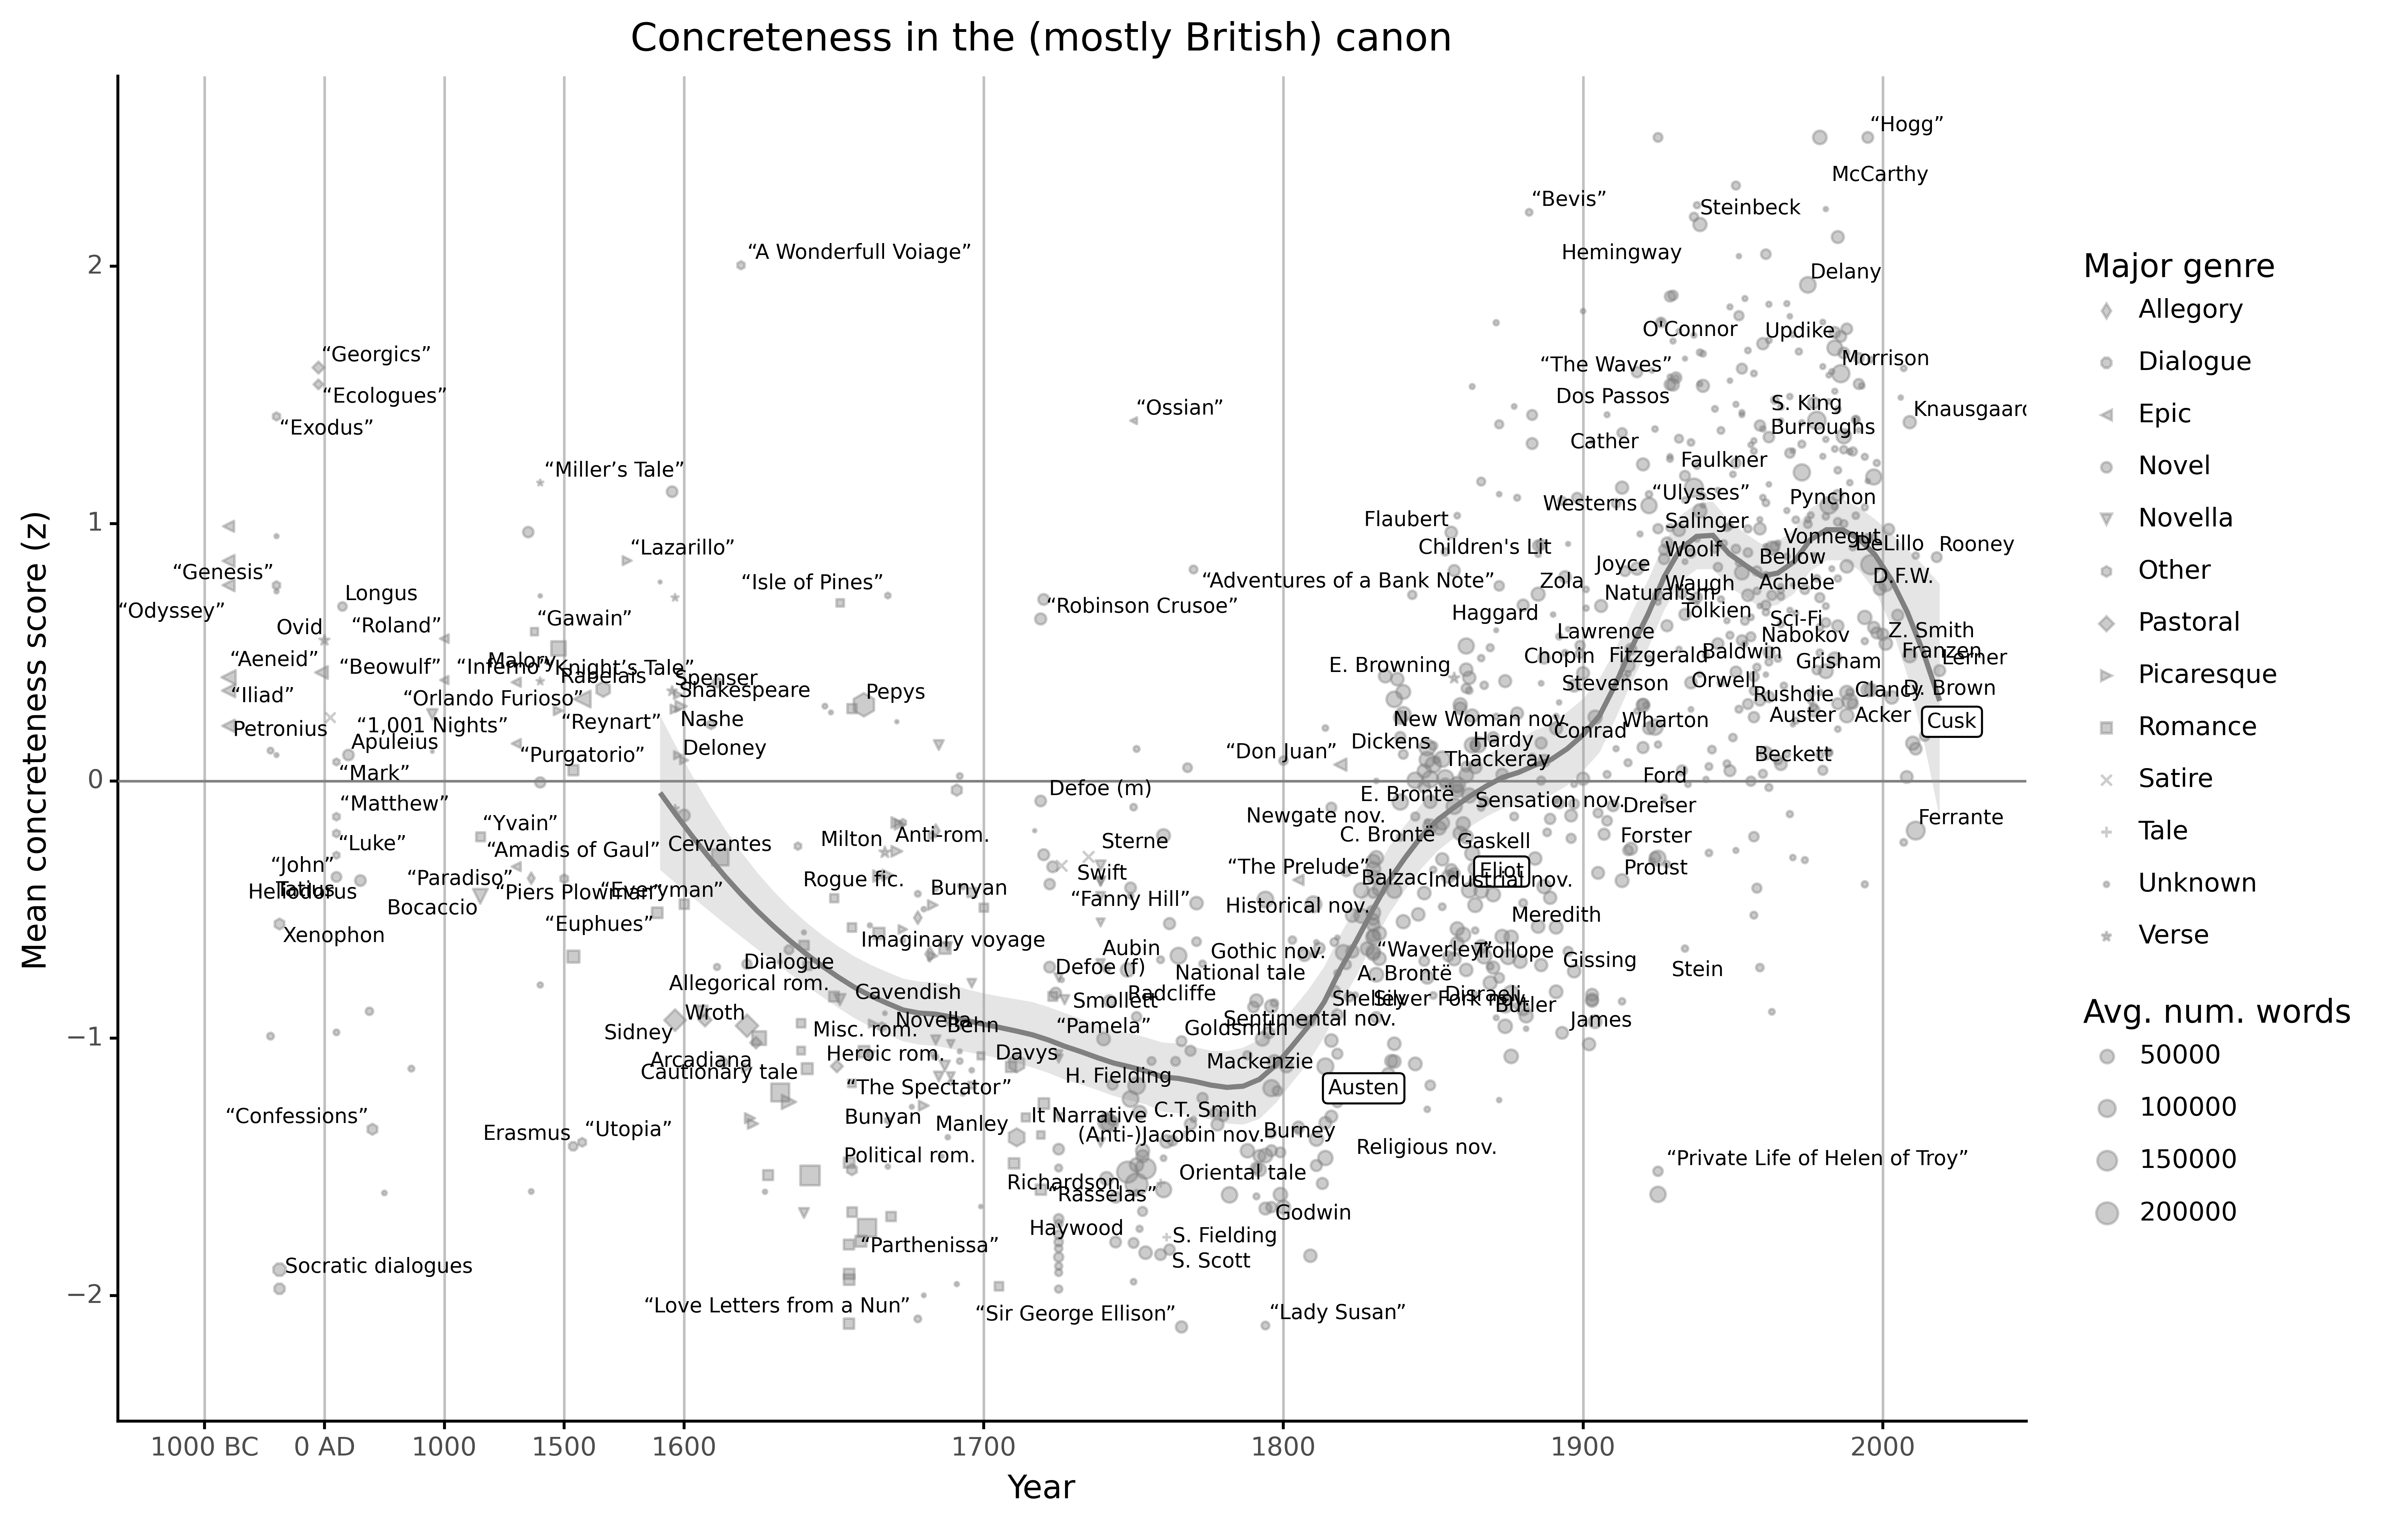

<ggplot: (8791673648561)>

In [11]:
# Plot
p9.options.dpi=600
yname='mean_z'
jitter=1
version='v17'
maxval=2.5
minval=-2.25
hl={'Austen','Cusk','Eliot'}
# hl|={'Dickens','Defoe','Richardson','Fielding','Haywood','James','Gissing','Flaubert','Sidney'}

# data
figdf0 = figdf.sample(frac=1).dropna()
if maxval: figdf0[yname]=figdf0[yname].apply(lambda x: x if x<maxval else maxval)
if minval: figdf0[yname]=figdf0[yname].apply(lambda x: x if x>minval else minval)

# split    
figdf_canon = figdf0.groupby(['major_genre','canon_genre']).mean().reset_index()
figdf_highl = figdf_canon[figdf_canon.canon_genre.isin(hl)]
figdf_canon = figdf_canon[~figdf_canon.canon_genre.isin(hl)]


figdf_all=figdf0.groupby(['major_genre','canon_genre','id']).mean().reset_index()

# start
fig = p9.ggplot(
    p9.aes(x='year',y=yname),
    data=figdf_all
)

# style
fig+=p9.theme_classic()

# axes
fig+=p9.geom_vline(xintercept=breaks,color='silver')
fig+=p9.geom_vline(xintercept=prebreaks,color='silver')
fig+=p9.geom_hline(yintercept=0.0,color='gray')



# trend
fig+=p9.geom_smooth(
    span=0.3,
    se=True,
    method='loess',
    alpha=0.25,
    color='gray',
    data=figdf_all.query('1580<=year_orig<=2020')
#     data=figdf_all.query('1600<=year_orig<2000')
)


# points
fig+=p9.geom_point(
    p9.aes(shape='major_genre',size='size'),
    color='gray',
#     size=.5,
    alpha=0.4,
#     data=figdf_all.query('1485<=year_orig<2020')
)



# labels
fig+=p9.geom_label(
    p9.aes(label='canon_genre'),
    size=7,
    data=figdf_highl,
    adjust_text=dict(expand_text=(0.5,0.15)) if jitter else None
)

fig+=p9.geom_text(
    p9.aes(label='canon_genre'),
    size=7,
    data=figdf_canon,
#     fontweight=600,
    adjust_text=dict(expand_text=(0.5,0.15)) if jitter else None
)




# # legends
fig+=p9.scale_shape_manual(shapes,show_legend=True,guide='legend')

# scales
fig+=p9.scale_x_continuous(
    breaks=prebreaks+breaks,
    labels=[(f'{x*-1} BC' if x<0 else f'{x} AD') if x<=0 else str(x)
            for x in prebreak_cuts+breaks],
)

# show
# fig+=p9.scale_color_gray()
fig+=p9.labs(
    title='Concreteness in the (mostly British) canon',
    x='Year',
    y=f'{yname.title().split("_")[0]} concreteness score (z)',
    shape='Major genre',
    size='Avg. num. words'
)
fig+=p9.scale_size_continuous((.5,4))
fig+=p9.ylim(minval,maxval)
fig.save(f'''../../figures/fig.concscores.canon.{yname}.{"j" if jitter else "x"}.{version}.png''')
fig